In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from specutils import Spectrum1D
import glob
from matplotlib.colors import Normalize, LinearSegmentedColormap


In [2]:
#load the collected spectrum
data = np.load('multiple_spectra_with_oh_lines.npy')

In [9]:
#normalise the data and transform it for skleanr suitability
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_data= scaler.fit_transform(data)


In [49]:
#PCA begins from here
from sklearn.decomposition import PCA
#Define number of components here
pca= PCA(n_components=5)
#performing fitting and transformation on the data
principal_comp=pca.fit_transform(normalised_data) 
reconstructed_data= pca.inverse_transform(principal_comp)

reconstructed_sky_data=scaler.inverse_transform(reconstructed_data)
subtraction= data - reconstructed_sky_data

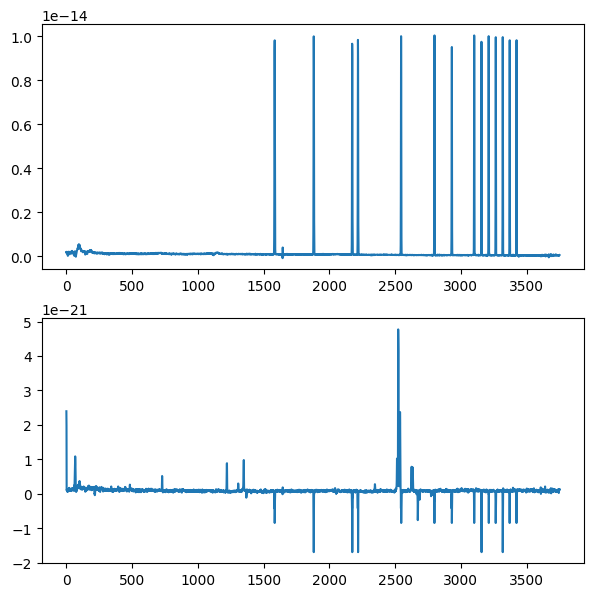

In [53]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(7,7))
ax[1].plot(subtraction[2,:])
ax[0].plot(data[2,:])
